<a href="https://colab.research.google.com/github/luixmartins/text-classification-python/blob/main/spam_deep_learning_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/ivanfilhoreis/bertVectorizer.git -q
!pip install -U sentence-transformers -q

    Running setup.py install for bertVectorizer ... done
  DEPRECATION: bertVectorizer was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
     |████████████████████████████████| 78 kB 3.6 MB/s 
     |████████████████████████████████| 3.5 MB 14.8 MB/s 
     |████████████████████████████████| 6.8 MB 40.0 MB/s 
     |████████████████████████████████| 1.2 MB 36.5 MB/s 
     |████████████████████████████████| 67 kB 2.2 MB/s 
     |████████████████████████████████| 895 kB 37.6 MB/s 
     |████████████████████████████████| 596 kB 41.6 MB/s 


In [14]:
import pandas as pd 
import numpy as np 
from bertVectorizer import bertVectorizer 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline 

#link to dataframe 
path = 'https://raw.githubusercontent.com/luixmartins/text-classification-python/main/datasets/spam_text_message.csv'
df = pd.read_csv(path)

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.columns = ['label', 'text']
df['label'] = [1 if category == 'spam' else 0 for category in df['label']]

df['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [4]:
vectorizer = bertVectorizer()

X = vectorizer.fit_transform(df).values
y = df.label.values

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)

X_scaled = scaler.transform(X)

In [30]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

X_train.shape

(4179, 6604)

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(6604,)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid') 
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
131/131 [==============================] - 7s 51ms/step - loss: 0.2796 - accuracy: 0.9282
Epoch 2/10
131/131 [==============================] - 7s 50ms/step - loss: 0.1265 - accuracy: 0.9576
Epoch 3/10
131/131 [==============================] - 7s 52ms/step - loss: 0.1263 - accuracy: 0.9603
Epoch 4/10
131/131 [==============================] - 7s 51ms/step - loss: 0.0732 - accuracy: 0.9744
Epoch 5/10
131/131 [==============================] - 7s 52ms/step - loss: 0.0868 - accuracy: 0.9727
Epoch 6/10
131/131 [==============================] - 7s 52ms/step - loss: 0.0649 - accuracy: 0.9775
Epoch 7/10
131/131 [==============================] - 8s 58ms/step - loss: 0.0675 - accuracy: 0.9787
Epoch 8/10
131/131 [==============================] - 7s 53ms/step - loss: 0.0594 - accuracy: 0.9809
Epoch 9/10
131/131 [==============================] - 6s 44ms/step - loss: 0.0555 - accuracy: 0.9818
Epoch 10/10
131/131 [==============================] - 6s 49ms/step - loss: 0.0527 - accura

In [48]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 18ms/step - loss: 0.1261 - accuracy: 0.9763


[0.12607404589653015, 0.976310133934021]

In [49]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [50]:
cf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

cf_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1199,    7],
       [  26,  161]], dtype=int32)>

Text(69.0, 0.5, 'True')

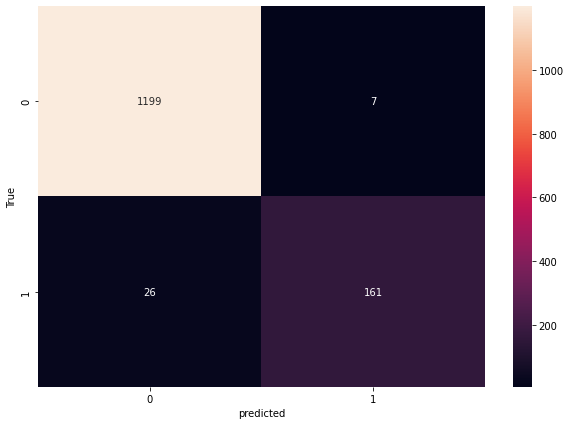

In [51]:
import seaborn as sns 

plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('True')